# NumPy: Numerical Arrays for Python

**Learning Objectives:** Learn how to create, transform and visualize multidimensional data of a single type using NumPy. 

NumPy is the foundation for scientific computing and data science in Python. Its core data structure is a multidimensional array with the following characteristics:

* Any number of dimensions
* All elements of an array have the same data type
* Array elements are usually native data dtype
* The memory for an array is a contiguous block that can be easily passed to other numerical libraries (BLAS, LAPACK, etc.).
* Most of NumPy is implemented in C, so it is fast.

## Plotting

While this notebook doesn't focus on plotting, Matplotlib will be used to make a few basic plots.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

style.use(['seaborn-darkgrid', 'seaborn-notebook'])

The `vizarray` package will be used to visualize NumPy arrays:

In [2]:
import vizarray as va

## Multidimensional array type

This is the canonical way you should import Numpy:

In [3]:
import numpy as np

NumPy arrays can be contructed from iterables:

In [4]:
data = [0,2,4,6]
a = np.array(data)

In [5]:
type(a)

numpy.ndarray

In [6]:
a

array([0, 2, 4, 6])

The `vz.vizarray` function can be used to visualize a 1d or 2d NumPy array using a colormap:

In [7]:
va.vizarray(a)

,,,


The shape of the array:

In [8]:
a.shape

(4,)

The number of array dimensions:

In [9]:
a.ndim

1

The number of array elements:

In [10]:
a.size

4

The number of bytes the array takes up:

In [11]:
a.nbytes

32

The `dtype` attribute describes the "data type" of the elements:

In [12]:
a.dtype

dtype('int64')

## Creating arrays

Multidimensional arrays can be created with nested lists or tuples:

In [13]:
data = [[0.0,2.0,4.0,6.0],[1.0,3.0,5.0,7.0]]
b = np.array(data)

In [14]:
b

array([[ 0.,  2.,  4.,  6.],
       [ 1.,  3.,  5.,  7.]])

In [15]:
va.vizarray(b)

,,,
,,,


In [16]:
b.shape, b.ndim, b.size, b.nbytes

((2, 4), 2, 8, 64)

The `arange` function is similar to Python's builtin `range` function, but creates an array:

In [17]:
c = np.arange(0.0, 10.0, 1.0) # Step size of 1.0
c

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

The `linspace` function is similar, but allows you to specify the number of points:

In [18]:
e = np.linspace(0.0, 5.0, 11) # 11 points
e

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ])

There are also `empty`, `zeros` and `ones` functions:

In [19]:
np.empty((4,4))

array([[  6.92032146e-310,   1.85175172e-316,   6.92031250e-310,
          6.92031250e-310],
       [  6.92031250e-310,   6.92031250e-310,   6.92031250e-310,
          6.92031250e-310],
       [  6.92031250e-310,   6.92031250e-310,   5.07904227e-317,
          5.07904227e-317],
       [  0.00000000e+000,   0.00000000e+000,   5.07904227e-317,
          0.00000000e+000]])

In [20]:
np.zeros((3,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [21]:
np.ones((3,3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

See also:

* `empty_like`, `ones_like`, `zeros_like`
* `eye`, `identity`, `diag`

## dtype

Arrays have a `dtype` attribute that encapsulates the "data type" of each element. It can be set:

* Implicitely by the element type
* By passing the `dtype` argument to an array creation function

Here is an integer valued array:

In [22]:
a = np.array([0,1,2,3])

In [23]:
a, a.dtype

(array([0, 1, 2, 3]), dtype('int64'))

All array creation functions accept an optional `dtype` argument:

In [24]:
b = np.zeros((2,2), dtype=np.complex64)
b

array([[ 0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j]], dtype=complex64)

In [25]:
c = np.arange(0, 10, 2, dtype=np.float)
c

array([ 0.,  2.,  4.,  6.,  8.])

You can use the `astype` method to create a copy of the array with a given `dtype`:

In [26]:
d = c.astype(dtype=np.int)
d

array([0, 2, 4, 6, 8])

IPython's tab completion is useful for exploring the various available `dtypes`:

In [27]:
np.float*?

np.float
np.float128
np.float16
np.float32
np.float64
np.float_
np.floating

The NumPy documentation on [dtypes](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html) describes the many other ways of specifying dtypes.

## Array operations

Basic mathematical operations are **elementwise** for:

* Scalars and arrays
* Arrays and arrays

Fill an array with a value:

In [28]:
a = np.empty((3,3))
a.fill(0.1)
a

array([[ 0.1,  0.1,  0.1],
       [ 0.1,  0.1,  0.1],
       [ 0.1,  0.1,  0.1]])

In [29]:
b = np.ones((3,3))
b

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

Addition is elementwise:

In [30]:
a+b

array([[ 1.1,  1.1,  1.1],
       [ 1.1,  1.1,  1.1],
       [ 1.1,  1.1,  1.1]])

Division is elementwise:

In [31]:
b/a

array([[ 10.,  10.,  10.],
       [ 10.,  10.,  10.],
       [ 10.,  10.,  10.]])

As are powers:

In [32]:
a**2

array([[ 0.01,  0.01,  0.01],
       [ 0.01,  0.01,  0.01],
       [ 0.01,  0.01,  0.01]])

Scalar multiplication is also elementwise:

In [33]:
np.pi*b

array([[ 3.14159265,  3.14159265,  3.14159265],
       [ 3.14159265,  3.14159265,  3.14159265],
       [ 3.14159265,  3.14159265,  3.14159265]])

## Indexing and slicing

Indexing and slicing provide an efficient way of getting the values in an array and modifying them.

In [34]:
a = np.random.rand(10,10)

The `enable` function is part of `vizarray` and enables a nice display of arrays:

In [35]:
va.enable_notebook()

In [36]:
a

,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


List Python lists and tuples, NumPy arrays have zero-based indexing and use the `[]` syntax for getting and setting values:

In [37]:
a[0,0]

0.2884370505546261

An index of `-1` refers to the last element along that axis:

In [38]:
a[-1,-1] == a[9,9]

True

Extract the 0th column using the `:` syntax, which denotes all elements along that axis.

In [39]:
a[:,0]

,,,,,,,,,


The last row:

In [40]:
a[-1,:]

,,,,,,,,,


You can also slice ranges:

In [41]:
a[0:2,0:2]

,
,


Assignment also works with slices:

In [42]:
a[0:5,0:5] = 1.0

In [43]:
a

,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Note how even though we assigned the value to the slice, the original array was changed. This clarifies that slices are **views** of the same data, not a copy.

In [44]:
va.disable_notebook()

### Boolean indexing

Arrays can be indexed using other arrays that have boolean values.

In [45]:
ages = np.array([23,56,67,89,23,56,27,12,8,72])
genders = np.array(['m','m','f','f','m','f','m','m','m','f'])

Boolean expressions involving arrays create new arrays with a `bool` dtype and the elementwise result of the expression:

In [46]:
ages > 30

array([False,  True,  True,  True, False,  True, False, False, False,  True], dtype=bool)

In [47]:
genders == 'm'

array([ True,  True, False, False,  True, False,  True,  True,  True, False], dtype=bool)

Boolean expressions provide an extremely fast and flexible way of querying arrays:

In [48]:
(ages > 10) & (ages < 50)

array([ True, False, False, False,  True, False,  True,  True, False, False], dtype=bool)

You can use a boolean array to index into the original or another array. This selects the ages of all females in the `genders` array:

In [49]:
mask = (genders == 'f')
ages[mask]

array([67, 89, 56, 72])

In [50]:
ages[ages>30]

array([56, 67, 89, 56, 72])

## Reshaping, transposing

In [51]:
va.enable_notebook()

In [52]:
a = np.random.rand(3,4)

In [53]:
a

,,,
,,,
,,,


The `T` atrribute contains the transpose of the original array:

In [54]:
a.T

,,
,,
,,
,,


The `reshape` method can be used to change the shape and even the number of dimensions:

In [55]:
a.reshape(2,6)

,,,,,
,,,,,


In [56]:
a.reshape(6,2)

,
,
,
,
,
,


The `ravel` method strings the array out in one dimension:

In [57]:
a.ravel()

,,,,,,,,,,,


In [58]:
va.disable_notebook()

## Universal functions

Universal function, or "ufuncs," are functions that take and return arrays or scalars. They have the following characteristics:

* Vectorized C implementations, much faster than hand written loops in Python
* Allow for concise Pythonic code
* Here is a complete list of the [available NumPy ufuncs](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs) lists the available ufuncs.

In [59]:
va.set_block_size(5)
va.enable_notebook()

Here is a linear sequence of values"

In [60]:
t = np.linspace(0.0, 4*np.pi, 100)
t

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


Take the $sin$ of each element of the array:

In [61]:
np.sin(t)

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


As the next two examples show, multiple ufuncs can be used to create complex mathematical expressions that can be computed efficiently:

In [62]:
np.exp(np.sqrt(t))

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [63]:
va.disable_notebook()
va.set_block_size(30)

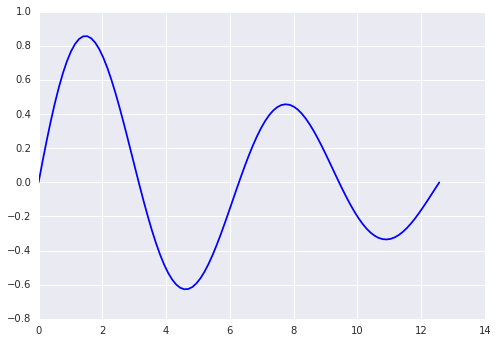

In [64]:
plt.plot(t, np.exp(-0.1*t)*np.sin(t));

In general, you should always try to use ufuncs rather than do computations using for loops. These types of array based computations are referred to as *vectorized*.

## Basic data processing

In [65]:
ages = np.array([23,56,67,89,23,56,27,12,8,72])
genders = np.array(['m','m','f','f','m','f','m','m','m','f'])

Numpy has a basic set of methods and function for computing basic quantities about data.

In [66]:
ages.min(), ages.max()

(8, 89)

Compute the mean:

In [67]:
ages.mean()

43.299999999999997

Compute the variance and standard deviation:

In [68]:
ages.var(), ages.std()

(711.21000000000004, 26.668520768876554)

The `bincount` function counts how many times each value occurs in the array:

In [69]:
np.bincount(ages)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

The `cumsum` and `cumprod` methods compute cumulative sums and products:

In [70]:
ages.cumsum()

array([ 23,  79, 146, 235, 258, 314, 341, 353, 361, 433])

In [71]:
ages.cumprod()

array([              23,             1288,            86296,
                7680344,        176647912,       9892283072,
           267091642944,    3205099715328,   25640797722624,
       1846137436028928])

Most of the functions and methods above take an `axis` argument that will apply the action along a particular axis:

In [72]:
a = np.random.randint(0,10,(3,4))
a

array([[3, 6, 5, 1],
       [2, 9, 3, 3],
       [0, 6, 0, 3]])

With `axis=0` the action takes place along rows:

In [73]:
a.sum(axis=0)

array([ 5, 21,  8,  7])

With `axis=1` the action takes place along columns:

In [74]:
a.sum(axis=1)

array([15, 17,  9])

The `unique` function is extremely useful in working with categorical data:

In [75]:
np.unique(genders)

array(['f', 'm'], 
      dtype='<U1')

In [76]:
np.unique(genders, return_counts=True)

(array(['f', 'm'], 
       dtype='<U1'), array([4, 6]))

The where function allows you to apply conditional logic to arrays. Here is a rough sketch of how it works:

```python
def where(condition, if_false, if_true):
```

In [77]:
np.where(ages>30, 0, 1)

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0])

The `if_false` and `if_true` values can be arrays themselves:

In [78]:
np.where(ages<30, 0, ages)

array([ 0, 56, 67, 89,  0, 56,  0,  0,  0, 72])

## File IO

NumPy has a a number of different function to reading and writing arrays to and from disk.

### Single array, binary format

In [79]:
a = np.random.rand(10)
a

array([ 0.93169785,  0.59444731,  0.54218421,  0.06179936,  0.28662907,
        0.34794862,  0.19588381,  0.57338884,  0.46852917,  0.2500546 ])

Save the array to a binary file named `array1.npy`:

In [80]:
np.save('array1', a)

In [81]:
ls

array1.npy  Day04.ipynb  Numpy.ipynb  Untitled.ipynb


Using `%pycat` to look at the file shows that it is binary:

In [82]:
!cat array1.npy

�NUMPY F {'descr': '<f8', 'fortran_order': False, 'shape': (10,), }           
�x��?q��Z��?�x���Y�?���Y*��?��Pw!X�?:!nF�D�?$qӆ��?��Ë3Y�?2+f�a��?Z�I � �?

Load the array back into memory:

In [83]:
a_copy = np.load('array1.npy')

In [84]:
a_copy

array([ 0.93169785,  0.59444731,  0.54218421,  0.06179936,  0.28662907,
        0.34794862,  0.19588381,  0.57338884,  0.46852917,  0.2500546 ])

### Single array, text format

In [85]:
b = np.random.randint(0,10,(5,3))
b

array([[5, 9, 6],
       [4, 4, 7],
       [1, 2, 0],
       [1, 6, 8],
       [6, 5, 3]])

The `savetxt` function saves arrays in a simple, textual format that is less effecient, but easier for other languges to read:

In [86]:
np.savetxt('array2.txt', b)

In [87]:
ls

array1.npy  array2.txt  Day04.ipynb  Numpy.ipynb  Untitled.ipynb


Using `%pycat` to look at the contents shows that the files is indeed a plain text file:

In [88]:
!cat array2.txt

5.000000000000000000e+00 9.000000000000000000e+00 6.000000000000000000e+00
4.000000000000000000e+00 4.000000000000000000e+00 7.000000000000000000e+00
1.000000000000000000e+00 2.000000000000000000e+00 0.000000000000000000e+00
1.000000000000000000e+00 6.000000000000000000e+00 8.000000000000000000e+00
6.000000000000000000e+00 5.000000000000000000e+00 3.000000000000000000e+00


In [89]:
np.loadtxt('array2.txt')

array([[ 5.,  9.,  6.],
       [ 4.,  4.,  7.],
       [ 1.,  2.,  0.],
       [ 1.,  6.,  8.],
       [ 6.,  5.,  3.]])

### Multiple arrays, binary format

The `savez` function provides an efficient way of saving multiple arrays to a single file:

In [90]:
np.savez('arrays.npz', a=a, b=b)

The `load` function returns a dictionary like object that provides access to the individual arrays:

In [91]:
a_and_b = np.load('arrays.npz')

In [92]:
a_and_b['a']

array([ 0.93169785,  0.59444731,  0.54218421,  0.06179936,  0.28662907,
        0.34794862,  0.19588381,  0.57338884,  0.46852917,  0.2500546 ])

In [93]:
a_and_b['b']

array([[5, 9, 6],
       [4, 4, 7],
       [1, 2, 0],
       [1, 6, 8],
       [6, 5, 3]])

## Linear algebra

NumPy has excellent linear algebra capabilities.

In [94]:
a = np.random.rand(5,5)
b = np.random.rand(5,5)

Remember that array operations are elementwise. Thus, this is **not** matrix multiplication:

In [95]:
a*b

array([[  2.40053953e-01,   1.04749615e-01,   6.83037299e-02,
          3.61902875e-01,   4.79248749e-01],
       [  3.00302356e-02,   9.31464431e-04,   2.88860419e-02,
          2.83772366e-01,   5.12925383e-01],
       [  4.52545569e-02,   1.87670340e-01,   8.51805905e-02,
          3.35016801e-01,   4.98830144e-02],
       [  8.90759999e-02,   3.26321631e-01,   4.94506502e-01,
          5.95380890e-01,   1.99906128e-01],
       [  1.53143598e-02,   2.16361672e-01,   4.34528154e-01,
          2.77806129e-04,   2.85859374e-02]])

To get matrix multiplication use `np.dot`:

In [96]:
np.dot(a, b)

array([[ 1.32969446,  0.82170888,  1.27313342,  0.81176221,  1.47173595],
       [ 1.34276291,  0.82708331,  1.1119631 ,  0.83872295,  1.22443318],
       [ 1.23354389,  0.92018876,  1.17115704,  1.04271311,  1.38817917],
       [ 1.30963768,  1.1144533 ,  1.10229592,  1.45401645,  1.53559693],
       [ 0.21857704,  0.40750627,  0.27377343,  0.61936666,  0.59484862]])

Or, NumPy as a `matrix` subclass for which matrix operations are the default:

In [97]:
m1 = np.matrix(a)
m2 = np.matrix(b)

In [98]:
m1*m2

matrix([[ 1.32969446,  0.82170888,  1.27313342,  0.81176221,  1.47173595],
        [ 1.34276291,  0.82708331,  1.1119631 ,  0.83872295,  1.22443318],
        [ 1.23354389,  0.92018876,  1.17115704,  1.04271311,  1.38817917],
        [ 1.30963768,  1.1144533 ,  1.10229592,  1.45401645,  1.53559693],
        [ 0.21857704,  0.40750627,  0.27377343,  0.61936666,  0.59484862]])

The `np.linalg` package has a wide range of fast linear algebra operations.

Here is determinant:

In [99]:
np.linalg.det(a)

-0.0058295937914988258

Matrix inverse:

In [100]:
np.linalg.inv(a)

array([[-1.44665038, -3.96294881,  6.75186607,  0.07937476, -3.20728703],
       [ 5.38562671, -5.00122793, -4.78978069,  4.73096489, -2.76966266],
       [-5.09489066,  4.73908731,  4.45013496, -4.49491088,  4.21609265],
       [ 0.80538956, -2.75554797, -0.04605329,  3.39427457, -4.12942491],
       [ 0.77238704,  5.12859552, -3.41691257, -3.10080567,  5.08656423]])

Eigenvalues:

In [101]:
np.linalg.eigvals(a)

array([ 2.24915598+0.j       , -0.71401931+0.j       ,
        0.29909559+0.j       ,  0.02485339+0.1073264j,
        0.02485339-0.1073264j])

NumPy can be built against fast BLAS/LAPACK implementation for these linear algebra operations.

In [102]:
c = np.random.rand(2000,2000)

In [103]:
%timeit -n1 -r1 evs = np.linalg.eigvals(c)

1 loops, best of 1: 18.4 s per loop


## Random numbers

NumPy has functions for creating arrays of random numbers from different distributions in `np.random`, as well as handling things like permutation, shuffling, and choosing.

Here is the [numpy.random documentation](http://docs.scipy.org/doc/numpy/reference/routines.random.html).

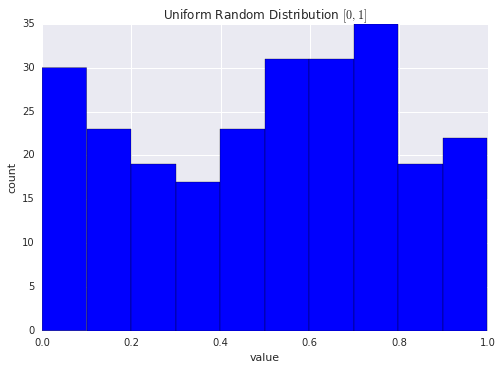

In [104]:
plt.hist(np.random.random(250))
plt.title('Uniform Random Distribution $[0,1]$')
plt.xlabel('value')
plt.ylabel('count')

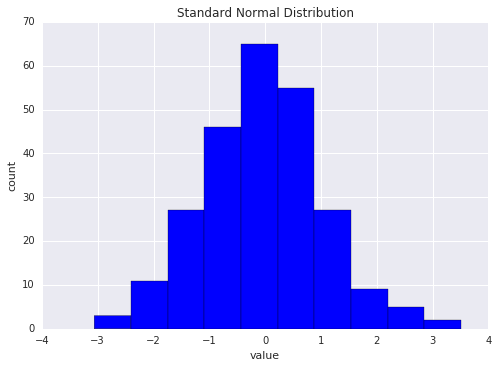

In [105]:
plt.hist(np.random.randn(250))
plt.title('Standard Normal Distribution')
plt.xlabel('value')
plt.ylabel('count')

The `shuffle` function shuffles an array in place:

In [106]:
a = np.arange(0,10)
np.random.shuffle(a)
a

array([5, 4, 0, 8, 6, 1, 2, 3, 9, 7])

The `permutation` function does the same thing but first makes a copy:

In [107]:
a = np.arange(0,10)
print(np.random.permutation(a))
print(a)

[5 4 0 9 7 2 8 1 3 6]
[0 1 2 3 4 5 6 7 8 9]


The `choice` function provides a powerful way of creating synthetic data sets of discrete data:

In [108]:
np.random.choice(['m','f'], 20, p=[0.25,0.75])

array(['f', 'f', 'm', 'f', 'f', 'm', 'f', 'f', 'f', 'f', 'm', 'f', 'f',
       'm', 'f', 'f', 'f', 'm', 'f', 'f'], 
      dtype='<U1')

## Resources

* [NumPy Reference Documentation](http://docs.scipy.org/doc/numpy/reference/)
* [Python Scientific Lecture Notes](http://scipy-lectures.github.io/index.html), Edited by Valentin Haenel,
Emmanuelle Gouillart and Gaël Varoquaux.
* [Lectures on Scientific Computing with Python](https://github.com/jrjohansson/scientific-python-lectures), J.R. Johansson.
* [Introduction to Scientific Computing in Python](http://nbviewer.ipython.org/github/jakevdp/2014_fall_ASTR599/tree/master/), Jake Vanderplas.